In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
import pickle

In [63]:
df= pd.read_csv("../input/IPL Ball-by-Ball 2008-2020.csv")
df2 = pd.read_csv("../input/IPL Matches 2008-2020.csv")

In [65]:
# df2.shape

In [66]:
display(df.head(), df2.head())

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [67]:
grp = df.groupby(['batsman'])['batsman_runs'].sum()

In [68]:
grp = grp.reset_index().sort_values(by='batsman_runs', ascending=False)

In [69]:
grp.head()

,batsman,batsman_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197


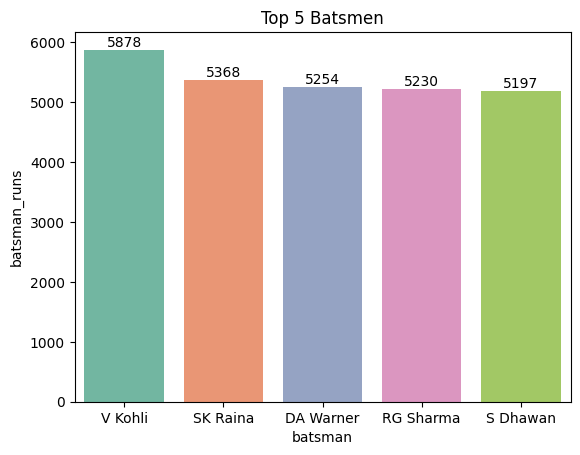

In [70]:
ax = sns.barplot(
    data=grp.head(),
    x='batsman',
    y='batsman_runs',
    palette='Set2'
)

plt.title('Top 5 Batsmen')
for i in ax.containers:
    ax.bar_label(i,)
    

In [71]:
df.dismissal_kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [72]:
indices = df[df['dismissal_kind'].isin(['run out','retired hurt','obstructing the field','nan'])].index

In [73]:
wickets_df = df.drop(df.index[list(indices)])

In [74]:
best_bowler = wickets_df.groupby(['bowler'])['is_wicket'].sum().reset_index()

In [75]:
top5_bowlers = best_bowler.sort_values(by='is_wicket', ascending=False).head()

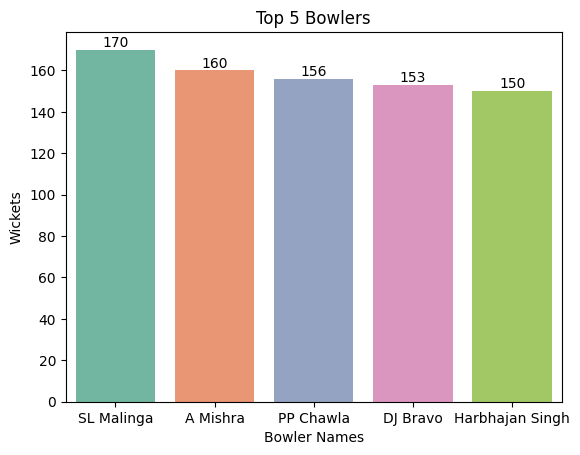

In [76]:
ax = sns.barplot(data=top5_bowlers, x='bowler', y='is_wicket',palette='Set2')
plt.title('Top 5 Bowlers')
plt.xlabel('Bowler Names')
plt.ylabel('Wickets')
for i in ax.containers:
    ax.bar_label(i,)

In [77]:
grp = df.groupby(['batsman','batting_team'])['batsman_runs'].sum()
grp = grp.reset_index().sort_values(by='batsman_runs', ascending=False)

In [78]:
#Top 5 best scorers from respective Teams
grp.head().reset_index(drop=True)

,batsman,batting_team,batsman_runs
0,V Kohli,Royal Challengers Bangalore,5878
1,SK Raina,Chennai Super Kings,4527
2,AB de Villiers,Royal Challengers Bangalore,4178
3,RG Sharma,Mumbai Indians,4060
4,MS Dhoni,Chennai Super Kings,4058


In [79]:
df2.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [80]:
grp  = df2.groupby(['winner'])['winner'].count()

In [81]:
grp = grp.sort_values(ascending=False)

In [82]:
#Top 5 winning Teams of all time
most_winning_teams = pd.DataFrame({'team':grp.index, 'times_won':grp}).reset_index(drop=True)
most_winning_teams.head()

,team,times_won
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Sunrisers Hyderabad,95
4,Royal Challengers Bangalore,91


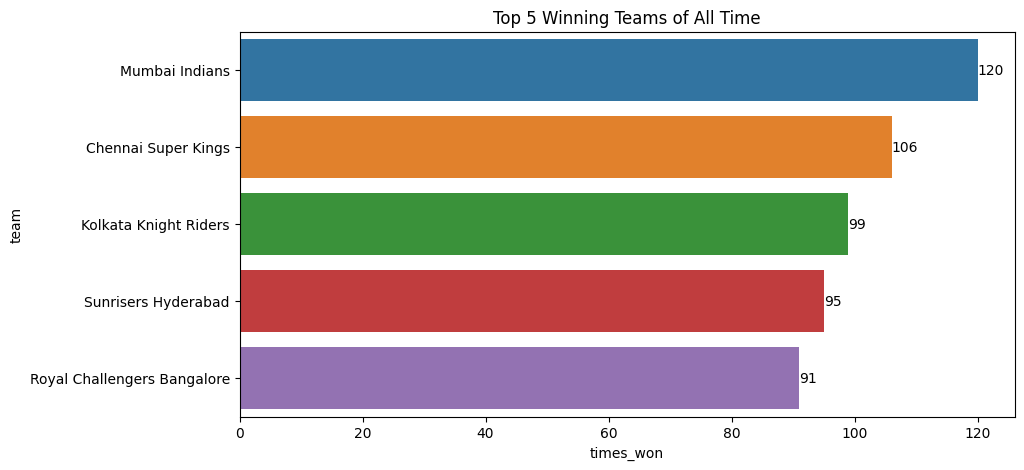

In [83]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data = most_winning_teams.head(), y='team', x='times_won')
plt.title('Top 5 Winning Teams of All Time')
for i in ax.containers:
    ax.bar_label(i,)
    

In [84]:
part2 = df[df["inning"]==2].reset_index(drop=True)

In [87]:
part2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2,6,2,CL White,MV Boucher,AB Agarkar,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,2,6,3,CL White,MV Boucher,AB Agarkar,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,2,6,4,MV Boucher,CL White,AB Agarkar,0,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
3,335982,2,6,5,MV Boucher,CL White,AB Agarkar,0,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,2,6,6,MV Boucher,CL White,AB Agarkar,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [88]:
part2 = part2.sort_values(['id','over','ball']).reset_index(drop=True)

In [89]:
part2

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2,0,1,R Dravid,W Jaffer,AB Dinda,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,2,0,2,W Jaffer,R Dravid,AB Dinda,0,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,2,0,3,W Jaffer,R Dravid,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
3,335982,2,0,4,W Jaffer,R Dravid,AB Dinda,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,2,0,5,R Dravid,W Jaffer,AB Dinda,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93272,1237181,2,17,6,HH Pandya,Ishan Kishan,K Rabada,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
93273,1237181,2,18,1,HH Pandya,Ishan Kishan,A Nortje,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
93274,1237181,2,18,2,Ishan Kishan,HH Pandya,A Nortje,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals
93275,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals


In [90]:
part2["extras_type"].unique()

array([nan, 'wides', 'legbyes', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [91]:
part2 = part2.drop(
    [
        "batsman",
        "bowler",
        "dismissal_kind",
        "player_dismissed",
        "fielder",
        "batting_team",
        "bowling_team",
        "batsman_runs"
    ], axis=1)

In [92]:
part2 =part2.drop('non_striker', axis =1)

In [93]:
set(df2["id"]) - set(part2["id"])

{501265, 829763}

In [94]:
df2[df2["winner"].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [95]:
part2.drop(part2[part2.id.isin([ 501265,  829763,  829813, 1178424])].index, inplace= True)

In [96]:
part2.shape

(93250, 9)

In [97]:
part2["fours"] = (part2["total_runs"]==4).astype(int)
part2["sixes"] = (part2["total_runs"]==6).astype(int)


In [98]:
part2 = part2.sort_values(by=['id','over','ball']).reset_index(drop=True)

In [99]:
part2["extras_type"] = (part2["extras_type"].isin(['wides','noballs'])==True).astype(int)

In [100]:
part2.head()

,id,inning,over,ball,extra_runs,total_runs,non_boundary,is_wicket,extras_type,fours,sixes
0,335982,2,0,1,0,1,0,0,0,0,0
1,335982,2,0,2,1,1,0,0,1,0,0
2,335982,2,0,3,0,0,0,0,0,0,0
3,335982,2,0,4,0,1,0,0,0,0,0
4,335982,2,0,5,0,1,0,0,0,0,0


### Creating balls_left feature

In [101]:
indx = part2[part2.extras_type == 1].index
for i in indx:
    part2['ball'][i]=0
part2["ball"] = (part2["ball"]!=0).astype(int)
part2["ball"] = part2.groupby(["id","over"])["ball"].cumsum()
for i in indx:
    part2['ball'][i]=0
for i in part2.index:
    if part2.ball[i]==0:
        part2.ball[i]=part2.ball[i-1]
part2["balls_left"] = 120 - (part2["over"]*6 + part2['ball'])

In [102]:
part2

,id,inning,over,ball,extra_runs,total_runs,non_boundary,is_wicket,extras_type,fours,sixes,balls_left
0,335982,2,0,1,0,1,0,0,0,0,0,119
1,335982,2,0,1,1,1,0,0,1,0,0,119
2,335982,2,0,2,0,0,0,0,0,0,0,118
3,335982,2,0,3,0,1,0,0,0,0,0,117
4,335982,2,0,4,0,1,0,0,0,0,0,116
...,...,...,...,...,...,...,...,...,...,...,...,...
93245,1237181,2,17,6,0,1,0,0,0,0,0,12
93246,1237181,2,18,1,0,1,0,0,0,0,0,11
93247,1237181,2,18,2,0,1,0,0,0,0,0,10
93248,1237181,2,18,3,0,0,0,1,0,0,0,9


In [103]:
part2.drop(["inning","extras_type", "non_boundary"], axis=1, inplace=True)

In [104]:
part2.head(5)

,id,over,ball,extra_runs,total_runs,non_boundary,is_wicket,fours,sixes,balls_left
0,335982,0,1,0,1,0,0,0,0,119
1,335982,0,1,1,1,0,0,0,0,119
2,335982,0,2,0,0,0,0,0,0,118
3,335982,0,3,0,1,0,0,0,0,117
4,335982,0,4,0,1,0,0,0,0,116


In [106]:
part2.total_runs = part2.groupby("id")["total_runs"].cumsum()
part2.fours = part2.groupby("id")["fours"].cumsum()
part2.sixes = part2.groupby("id")["sixes"].cumsum()
part2.extra_runs = part2.groupby("id")["extra_runs"].cumsum()
part2.is_wicket = part2.groupby("id")["is_wicket"].cumsum()

In [107]:
part2

,id,over,ball,extra_runs,total_runs,is_wicket,fours,sixes,balls_left
0,335982,0,1,0,1,0,0,0,119
1,335982,0,1,1,2,0,0,0,119
2,335982,0,2,1,2,0,0,0,118
3,335982,0,3,1,3,0,0,0,117
4,335982,0,4,1,4,0,0,0,116
...,...,...,...,...,...,...,...,...,...
93245,1237181,17,6,4,154,4,15,7,12
93246,1237181,18,1,4,155,4,15,7,11
93247,1237181,18,2,4,156,4,15,7,10
93248,1237181,18,3,4,156,5,15,7,9


In [108]:
part2['run_rate']= (part2['total_runs']/(part2['ball']+part2['over']*6))*6
part2["over_left"] = 19 - part2["over"]

In [109]:
part2

,id,over,ball,extra_runs,total_runs,is_wicket,fours,sixes,balls_left,run_rate,over_left
0,335982,0,1,0,1,0,0,0,119,6.000000,19
1,335982,0,1,1,2,0,0,0,119,12.000000,19
2,335982,0,2,1,2,0,0,0,118,6.000000,19
3,335982,0,3,1,3,0,0,0,117,6.000000,19
4,335982,0,4,1,4,0,0,0,116,6.000000,19
...,...,...,...,...,...,...,...,...,...,...,...
93245,1237181,17,6,4,154,4,15,7,12,8.555556,2
93246,1237181,18,1,4,155,4,15,7,11,8.532110,1
93247,1237181,18,2,4,156,4,15,7,10,8.509091,1
93248,1237181,18,3,4,156,5,15,7,9,8.432432,1


In [110]:
group_1 = df.groupby(["id","inning"]).agg(
    {
        "total_runs":sum,
        "is_wicket":sum,
        "extra_runs":sum,
        "over":lambda x:max(x)+1,
        "batting_team": lambda x: x.iloc[0],
        "bowling_team": lambda x: x.iloc[0]
    }
).reset_index()

In [111]:
group_1

,id,inning,total_runs,is_wicket,extra_runs,over,batting_team,bowling_team
0,335982,1,222,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2,82,10,19,16,Royal Challengers Bangalore,Kolkata Knight Riders
2,335983,1,240,5,6,20,Chennai Super Kings,Punjab Kings
3,335983,2,207,4,11,20,Punjab Kings,Chennai Super Kings
4,335984,1,129,8,7,20,Rajasthan Royals,Delhi Capitals
...,...,...,...,...,...,...,...,...
1625,1237178,2,132,4,10,20,Sunrisers Hyderabad,Royal Challengers Bangalore
1626,1237180,1,189,3,8,20,Delhi Capitals,Sunrisers Hyderabad
1627,1237180,2,172,8,6,20,Sunrisers Hyderabad,Delhi Capitals
1628,1237181,1,156,7,4,20,Delhi Capitals,Mumbai Indians


In [112]:
group_1 = group_1[group_1["inning"]==1]

In [113]:
group_1['total_runs'] = group_1['total_runs']+1

In [114]:
group_1 = group_1.rename(columns ={"total_runs":"team1_score",
                        "is_wicket":"team1_wickets",
                        "extra_runs":"team1_extra_runs",
                        "over":"over_playedBy_team1",
                        "batting_team":"team1",
                        "bowling_team":"team2"})

In [115]:
part2 = part2.rename(columns ={"total_runs":"current_score",
                        "is_wicket":"wicket_loss",
                        "extra_runs":"total_extra_runs",
                        "over":"current_over",
                        "ball":"current_ball_of_over",
                        "sixes":"sixes_team2",
                        "fours":"fours_team2",
                              "run_rate":"current_run_rate"})

In [116]:
dataset = part2.merge(
    group_1[
            [
                "id",
                "team1_score",
                "team1_wickets",
                "team1_extra_runs",
                "over_playedBy_team1",
                "team1",
                "team2"
            ]
    ], how="left", on="id")

In [117]:
dataset.head()

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,over_left,team1_score,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2
0,335982,0,1,0,1,0,0,0,119,6.0,19,223,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,0,1,1,2,0,0,0,119,12.0,19,223,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,0,2,1,2,0,0,0,118,6.0,19,223,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,0,3,1,3,0,0,0,117,6.0,19,223,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,0,4,1,4,0,0,0,116,6.0,19,223,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore


In [118]:
dataset["required_runs"] = dataset["team1_score"] - dataset["current_score"]
dataset["required_run_rate"] = abs((dataset["required_runs"]/dataset['balls_left'])*6)

In [119]:
dataset[dataset["required_run_rate"].isna()]

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,over_left,team1_score,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2,required_runs,required_run_rate
3172,336009,19,6,11,188,6,20,5,0,9.40,0,188,5,12,20,Delhi Capitals,Chennai Super Kings,0,NaN
5980,336036,19,6,16,146,5,13,2,0,7.30,0,146,7,13,20,Mumbai Indians,Rajasthan Royals,0,NaN
6423,336040,19,6,14,164,7,13,5,0,8.20,0,164,5,7,20,Chennai Super Kings,Rajasthan Royals,0,NaN
9231,392207,19,6,10,154,4,13,4,0,7.70,0,154,3,7,20,Kolkata Knight Riders,Punjab Kings,0,NaN
12055,392231,19,6,5,189,3,17,8,0,9.45,0,189,3,20,20,Chennai Super Kings,Kolkata Knight Riders,0,NaN
31236,548332,19,6,2,147,3,12,2,0,7.35,0,147,4,14,20,Rajasthan Royals,Chennai Super Kings,0,NaN
31600,548335,19,6,9,127,5,12,1,0,6.35,0,127,7,3,20,Sunrisers Hyderabad,Kolkata Knight Riders,0,NaN
33771,548355,19,6,3,174,8,21,5,0,8.70,0,174,8,9,20,Chennai Super Kings,Mumbai Indians,0,NaN
61834,980949,19,6,7,196,7,22,3,0,9.80,0,196,3,7,20,Rising Pune Supergiants,Gujarat Titans,0,NaN
64945,981005,19,6,8,173,6,14,8,0,8.65,0,173,7,4,20,Punjab Kings,Rising Pune Supergiants,0,NaN


In [120]:
dataset["required_run_rate"].fillna(0, inplace= True)

In [121]:
dataset[dataset["required_run_rate"].isna()]

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,over_left,team1_score,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2,required_runs,required_run_rate


In [122]:
indx_of_inf = dataset[np.isinf(dataset.required_run_rate)].index

In [123]:
for i in indx_of_inf:
    dataset.required_run_rate[i] = (dataset["required_runs"][i]/0.001)*6

In [124]:
dataset.tail()

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,over_left,team1_score,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2,required_runs,required_run_rate
93245,1237181,17,6,4,154,4,15,7,12,8.555556,2,157,7,4,20,Delhi Capitals,Mumbai Indians,3,1.500000
93246,1237181,18,1,4,155,4,15,7,11,8.532110,1,157,7,4,20,Delhi Capitals,Mumbai Indians,2,1.090909
93247,1237181,18,2,4,156,4,15,7,10,8.509091,1,157,7,4,20,Delhi Capitals,Mumbai Indians,1,0.600000
93248,1237181,18,3,4,156,5,15,7,9,8.432432,1,157,7,4,20,Delhi Capitals,Mumbai Indians,1,0.666667
93249,1237181,18,4,4,157,5,15,7,8,8.410714,1,157,7,4,20,Delhi Capitals,Mumbai Indians,0,0.000000


In [125]:
dataset.shape

(93250, 19)

In [126]:
match_data = df2[["id","venue","toss_decision","winner"]]
dataset = dataset.merge(match_data, how='left',on="id")
dataset["team2_won_match"] = (dataset["team2"] == dataset["winner"]).astype(int)
dataset["team2_won_toss"]=(dataset["toss_decision"] == 'field').astype(int)
dataset.drop(["winner","toss_decision"], axis=1, inplace= True)

In [61]:
dataset

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,...,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2,required_runs,required_run_rate,venue,team2_won_match,team2_won_toss
0,335982,0,1,0,1,0,0,0,119,6.000000,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,222,11.193277,M Chinnaswamy Stadium,0,1
1,335982,0,1,1,2,0,0,0,119,12.000000,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,221,11.142857,M Chinnaswamy Stadium,0,1
2,335982,0,2,1,2,0,0,0,118,6.000000,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,221,11.237288,M Chinnaswamy Stadium,0,1
3,335982,0,3,1,3,0,0,0,117,6.000000,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,220,11.282051,M Chinnaswamy Stadium,0,1
4,335982,0,4,1,4,0,0,0,116,6.000000,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,219,11.327586,M Chinnaswamy Stadium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93245,1237181,17,6,4,154,4,15,7,12,8.555556,...,7,4,20,Delhi Capitals,Mumbai Indians,3,1.500000,Dubai International Cricket Stadium,1,0
93246,1237181,18,1,4,155,4,15,7,11,8.532110,...,7,4,20,Delhi Capitals,Mumbai Indians,2,1.090909,Dubai International Cricket Stadium,1,0
93247,1237181,18,2,4,156,4,15,7,10,8.509091,...,7,4,20,Delhi Capitals,Mumbai Indians,1,0.600000,Dubai International Cricket Stadium,1,0
93248,1237181,18,3,4,156,5,15,7,9,8.432432,...,7,4,20,Delhi Capitals,Mumbai Indians,1,0.666667,Dubai International Cricket Stadium,1,0


In [127]:
dataset["required_run_rate"] = np.round(dataset["required_run_rate"], decimals=2)

In [128]:
dataset["team2_won_match"].isna().sum()

0

In [129]:
dataset.to_csv("../input/inning_2.csv", index= False)

In [130]:
dataset.shape

(93250, 22)

In [133]:
dataset.corr()

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,over_left,team1_score,team1_wickets,team1_extra_runs,over_playedBy_team1,required_runs,required_run_rate,team2_won_match,team2_won_toss
id,1.000000,0.009289,0.000565,-0.137799,0.060962,-0.010978,0.033174,0.136591,-0.009312,0.117249,-0.009289,0.167145,-0.050211,-0.172074,0.040882,0.040168,-0.000488,0.023384,0.242835
current_over,0.009289,1.000000,-0.013495,0.557059,0.938740,0.748917,0.788331,0.610579,-0.998690,0.133562,-1.000000,0.075915,-0.040626,0.006350,0.081095,-0.831200,0.080479,-0.059996,-0.007133
current_ball_of_over,0.000565,-0.013495,1.000000,0.022697,0.033964,0.028880,0.031546,0.021592,-0.037679,0.010978,0.013495,0.003138,-0.001418,0.000154,0.001313,-0.029846,0.065027,-0.005271,0.000281
total_extra_runs,-0.137799,0.557059,0.022697,1.000000,0.552830,0.425637,0.447659,0.331366,-0.557876,0.159178,-0.557059,0.036786,-0.012822,0.020682,0.030474,-0.494096,0.045332,-0.017510,-0.004689
current_score,0.060962,0.938740,0.033964,0.552830,1.000000,0.620221,0.874954,0.754457,-0.939897,0.350613,-0.938740,0.190494,-0.097722,0.001757,0.071200,-0.821818,0.072746,0.023084,0.026599
wicket_loss,-0.010978,0.748917,0.028880,0.425637,0.620221,1.000000,0.466526,0.390644,-0.749931,-0.066450,-0.748917,0.168342,-0.086279,0.045341,0.046452,-0.480577,0.108338,-0.336201,0.029845
fours_team2,0.033174,0.788331,0.031546,0.447659,0.874954,0.466526,1.000000,0.489329,-0.789458,0.396780,-0.788331,0.144131,-0.061236,0.009244,0.077904,-0.732136,0.047711,0.096969,0.046448
sixes_team2,0.136591,0.610579,0.021592,0.331366,0.754457,0.390644,0.489329,1.000000,-0.611306,0.393922,-0.610579,0.285898,-0.129237,-0.002962,0.025164,-0.537509,0.052003,0.044831,0.073743
balls_left,-0.009312,-0.998690,-0.037679,-0.557876,-0.939897,-0.749931,-0.789458,-0.611306,1.000000,-0.134041,0.998690,-0.076029,0.040673,-0.006354,-0.081112,0.832212,-0.083756,0.060228,0.007114
current_run_rate,0.117249,0.133562,0.010978,0.159178,0.350613,-0.066450,0.396780,0.393922,-0.134041,1.000000,-0.133562,0.218988,-0.106142,-0.017098,-0.053058,-0.199807,-0.000711,0.163305,0.083374


In [2]:
dataset = pd.read_csv('dataset_v2.csv')

In [3]:
dataset.head()

,id,current_over,current_ball_of_over,total_extra_runs,current_score,wicket_loss,fours_team2,sixes_team2,balls_left,current_run_rate,...,team1_wickets,team1_extra_runs,over_playedBy_team1,team1,team2,required_runs,required_run_rate,venue,team2_won?,team2_won_toss
0,335982,0,1,0,1,0,0,0,119,6.0,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,222,11.19,M Chinnaswamy Stadium,0,1
1,335982,0,1,1,2,0,0,0,119,12.0,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,221,11.14,M Chinnaswamy Stadium,0,1
2,335982,0,2,1,2,0,0,0,118,6.0,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,221,11.24,M Chinnaswamy Stadium,0,1
3,335982,0,3,1,3,0,0,0,117,6.0,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,220,11.28,M Chinnaswamy Stadium,0,1
4,335982,0,4,1,4,0,0,0,116,6.0,...,3,17,20,Kolkata Knight Riders,Royal Challengers Bangalore,219,11.33,M Chinnaswamy Stadium,0,1


In [4]:
dataset.rename(columns={'team2_won?':'team2_won_match'}, inplace=True)

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
matches = dataset.id.unique()
np.random.shuffle(matches)
y = dataset["team2_won_match"]
dataset.drop("team2_won_match", axis=1, inplace=True)


# dataset = pd.get_dummies(dataset)
# column_sequence = dataset.columns
X_train = dataset[dataset.id.isin(matches[:int(0.75*len(matches))])]
X_test = dataset[dataset.id.isin(matches[int(0.75*len(matches)):])]
y_train = (((y[dataset.id.isin(matches[:int(0.75*len(matches))])])==1).astype(int)).values
y_test = (((y[dataset.id.isin(matches[int(0.75*len(matches)):])])==1).astype(int)).values
X_train.drop("id", axis=1,inplace=True)
X_test.drop("id", axis=1,inplace=True)

categorical_cols = X_train.select_dtypes(include ='object').values
numerical_cols = X_train.select_dtypes(exclude='object').values
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
encoder.fit(categorical_cols)
min_scaler = MinMaxScaler()
min_scaler.fit(numerical_cols)
std_scaler = StandardScaler()
std_scaler.fit(numerical_cols)

with open("saved_pickle/encoders2.pkl","wb") as f:
            pickle.dump({
                "min_scaler":min_scaler,
                "std_scaler":std_scaler,
                "encoder":encoder
            },f)

train_test_split = {"X_train": X_train,
                   "y_train": y_train,
                   "X_test":X_test,
                   "y_test":y_test}

with open("Train_test_samples/train_test_split2.pkl", 'wb') as a:
    pickle.dump(train_test_split,a)

In [75]:
x = X_train.columns

with open("saved_pickle/col_seq2.pkl",'wb') as a:
    pickle.dump(x,a)